### Author: Dipmalya Chakraborty
## Task-1: Prediction Using Supervised Machine Learning
Problem Statement: Predict the percentage of a student based on the number of study hours.

In [1]:
##Importing important libraries---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##importing Dataset-
Data = pd.read_csv('student_scores.csv')
Data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Thus there are no null values.

In [4]:
#datatype information
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Visualizing Data

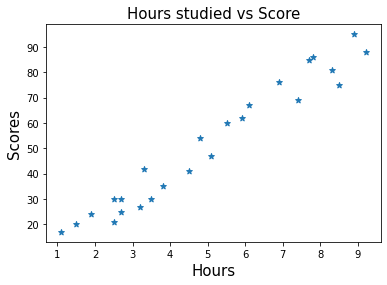

In [5]:
##ploting Scatter plot----
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=15)
plt.scatter(Data.Hours,Data.Scores,marker='*')
plt.show()

The Scatter Plot indicates positive linear relationship, i.e. marks scored by a student is proportional to the number of study hours.

### Preparing Data and splitting into train and test sets.

In [6]:
X = Data.iloc[:,:-1].values
Y = Data.iloc[:,1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [8]:
## We have Splitted Our Data Using 80:20 RULe(PARETO)
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


### Training the Model

In [9]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [10]:
##Fitting Training Data
linreg.fit(X_train,Y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


In [11]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)## β0 is Intercept & Slope of the line is β1.,"

B0 = 2.018160041434683 
B1 = [9.91065648]


In [12]:
##plotting the REGRESSION LINE---
Y0 = linreg.intercept_ + linreg.coef_*X_train

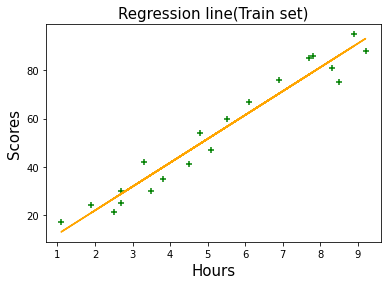

In [13]:
##plotting on train data
plt.scatter(X_train,Y_train,color='green',marker='+')
plt.plot(X_train,Y0,color='orange')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=15)
plt.show()

### Testing the Data

In [14]:
Y_pred=linreg.predict(X_test)##predicting the Scores for test data
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [15]:
#now print the Y_test.
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

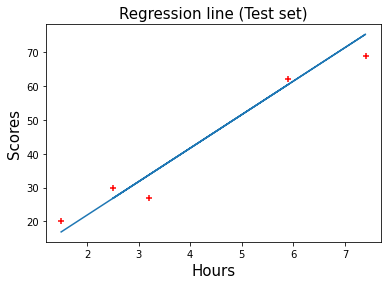

In [16]:
#plotting line on test data
plt.plot(X_test,Y_pred)
plt.scatter(X_test,Y_test,color='red',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line (Test set)",fontsize=15)
plt.show()

### Actual vs Predicted Scores

In [17]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Accuracy of the Model

In [18]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)  #Accuracy of fit Test

0.9454906892105356

Above 94% indicates that our model is accurate.

### Predicting the Error

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [20]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.5987693072174
Root Mean Squared Error =  4.6474476121003665
Mean Absolute Error     =  4.6474476121003665


### Predicting the score

In [21]:
Prediction_score = linreg.predict([[9.25]])
print("Predicted score for a student studying 9.25 hours :",Prediction_score)

Predicted score for a student studying 9.25 hours : [93.69173249]


## CONCLUSION:
### From the above result we can say that if a student studies for 9.25 hours then the student will secure 93.69 marks.